<a href="https://colab.research.google.com/github/joaopsantana/bootcampdiobancocarrefour/blob/main/Joao_Paulo_Dio_Projeto_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 01 - Analisando planilha de dados com a biblioteca Pandas
Vamos utilizar a biblioteca pandas do python para fazer transformações e analises nos dados da planilha 'AdventureWorks.xlsx', disponível no anexo do Projeto 01 do bootcamp Banco Carrefour Data Engineer - Digital Innovation One. 

Vamos fazer algumas simulações de dúvidas que podem surgir durante o processo de análise de dados com o pandas.

Selecione a pasta arquivos no canto lateral esquerdo da tela deste colab e faça o upload do arquivo 'AdventureWorks.xlsx' para acompanhar passo a passo.

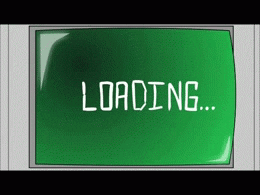

Resumo das atividades a serem feitas:


*   Importação da biblioteca e leitura do arquivo excel
*   Visualizar resumos dos dados
*   Criação de colunas com novos dados
*   Filtragem de dados
*   Renomear colunas
*   Transformação dos dados em série temporal
*   Agrupamento e totalização de dados em várias frequências(Diário, Semanal e Mensal)
*   Criação de gráficos(em barras, temporais e comparados)
*   Construção de relatório
*   Transformação de série temporal mensal em diária(Criação de valores NaN,   upsampling e interpolação)











Verifique cada comentário, eles vão ajudar você a entender cada passo por linha. O primeiro deles é importar o pandas:

In [ ]:
#Importando Biblioteca Pandas
import pandas as pd

In [ ]:
#Leitura dos Arquivos
df = pd.read_excel("AdventureWorks.xlsx")

In [ ]:
#Verificando a presença de valores nulos
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
dtype: int64

In [ ]:
#Descrição dos dados
df.describe()

,ID Loja,ID Produto,ID Cliente,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda
count,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000
mean,270.015487,1225.238938,19029.092920,272.006150,742.527965,62.950221,689.123294,6620.139538
std,50.955280,706.698742,96.427655,129.765051,368.589889,148.945964,822.363117,4319.407257
min,199.000000,366.000000,18815.000000,5.090000,9.990000,2.000000,0.000000,159.840000
25%,199.000000,384.000000,18964.750000,324.690000,758.000000,6.000000,0.000000,3920.000000
50%,306.000000,1202.000000,19060.000000,330.660000,980.000000,9.000000,461.166000,5798.700000
75%,307.000000,1226.000000,19107.000000,348.580000,998.000000,17.000000,1005.075000,7986.000000
max,307.000000,2497.000000,19145.000000,348.580000,999.000000,1560.000000,6272.000000,29400.000000


In [ ]:
#Exibindo as 5 primeiras linhas
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [ ]:
#Exibindo as 5 últimas linhas
df.tail()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
899,2008-03-22,2008-04-04,306,1226,19049,200803224CS555,330.99,999.0,6,419.58,5574.42,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black
900,2008-10-04,2008-10-15,306,1155,19057,200810044CS636,324.69,980.0,6,1176.00,4704.00,Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black
901,2008-12-11,2008-12-15,306,1155,19060,200812114CS676,324.69,980.0,6,1176.00,4704.00,Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black
902,2008-12-17,2008-12-21,306,1226,19060,200812174CS676,330.99,999.0,6,1198.80,4795.20,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black
903,2008-12-21,2008-12-25,306,1155,19060,200812214CS676,324.69,980.0,6,1176.00,4704.00,Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black


In [ ]:
#Verificando os tipos
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

Qual a receita total no período ?

In [ ]:
#Qual a receita total ?
round(df['Valor Venda'].sum(), 2)

5984606.14

Criando novas colunas nos dados

In [ ]:
#Criando uma coluna de Custo
df["Custo"] = df['Custo Unitário'].mul(df['Quantidade'])

Qual foi o custo total ?

In [ ]:
#Qual o custo total ?
round(df['Custo'].sum(), 2)

2486783.05

In [ ]:
#Criando uma coluna de Lucro
df["Lucro"] = df["Valor Venda"] - df["Custo"]

Qual foi o lucro total ?

In [ ]:
#Qual o custo total ?
round(df['Lucro'].sum(), 2)

3497823.09

In [ ]:
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


In [ ]:
#Verificando a dimensão dos dados
df.shape

(904, 18)

Filtragem nos dados

Filtragem nos dados por ano(2008 e 2009)

*   Descubra o total dos lucros por ano
*   Transforme os dados em uma série temporal
*   Modifique o nome das colunas








In [ ]:
#Filtrando os dados pela coluna com a Data Venda nos anos de 2008 e 2009
#2008
df1 = df.loc[(df["Data Venda"].dt.year == 2008)]
#2009
df2 = df.loc[(df["Data Venda"].dt.year == 2009)]



Lucro total em 2008:

In [ ]:
#Qual o lucro total em 2008 ?
round(df1['Lucro'].sum(), 2)

1920077.71

Lucro total em 2009:

In [ ]:
#Qual o lucro total em 2009 ?
round(df2['Lucro'].sum(), 2)

1577745.38

In [ ]:
df1

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.00,4548.00,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.00,4548.00,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.00,4548.00,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.00,4548.00,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.00,4548.00,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,2008-03-22,2008-04-04,306,1226,19049,200803224CS555,330.99,999.0,6,419.58,5574.42,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,1985.94,3588.48
900,2008-10-04,2008-10-15,306,1155,19057,200810044CS636,324.69,980.0,6,1176.00,4704.00,Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,1948.14,2755.86
901,2008-12-11,2008-12-15,306,1155,19060,200812114CS676,324.69,980.0,6,1176.00,4704.00,Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,1948.14,2755.86
902,2008-12-17,2008-12-21,306,1226,19060,200812174CS676,330.99,999.0,6,1198.80,4795.20,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,1985.94,2809.26


In [ ]:
#Totalizando em 2008 e 2009 os valores pelo Lucro
df1_previsao = df1.groupby(df1["Data Venda"].dt.month)["Lucro"].sum()
df1_previsao2 = df2.groupby(df2["Data Venda"].dt.month)["Lucro"].sum()

In [ ]:
#Detalhe dos lucros em 2008 por mês 
df1_previsao

Data Venda
1      72633.440
2     138956.890
3     100646.320
4     110316.550
5     219766.940
6     312484.366
7     165717.630
8      97024.109
9     160624.428
10    194786.372
11    137802.748
12    209317.918
Name: Lucro, dtype: float64

In [ ]:
#Detalhe dos lucros em 2008 por mês 
df1_previsao2

Data Venda
1     130719.0420
2     179228.9236
3     147538.2540
4      66354.3860
5      90540.0000
6     200310.4100
7     227134.5100
8      46756.4200
9      83952.6240
10    130678.0520
11    132202.2260
12    142330.5340
Name: Lucro, dtype: float64

In [ ]:
#Juntando os agrupamentos os dois agrupamentos Data Venda e Lucro correspondentes aos anos 2008 e 2009
agrupar = df1_previsao.append(df1_previsao2)

In [ ]:
agrupar

Data Venda
1      72633.4400
2     138956.8900
3     100646.3200
4     110316.5500
5     219766.9400
6     312484.3660
7     165717.6300
8      97024.1090
9     160624.4280
10    194786.3720
11    137802.7480
12    209317.9180
1     130719.0420
2     179228.9236
3     147538.2540
4      66354.3860
5      90540.0000
6     200310.4100
7     227134.5100
8      46756.4200
9      83952.6240
10    130678.0520
11    132202.2260
12    142330.5340
Name: Lucro, dtype: float64

In [ ]:
#Modificando para DataFrame
df_agrupado = pd.DataFrame(agrupar)

In [ ]:
df_agrupado

,Lucro
Data Venda,
1,72633.4400
2,138956.8900
3,100646.3200
4,110316.5500
5,219766.9400
6,312484.3660
7,165717.6300
8,97024.1090
9,160624.4280


Renomeando o nome das colunas. É um processo que pode ser usado para tornar mais evidente a natureza da coluna ou como exigencia no uso de bibliotecas. Um exemplo está na previsão de valores em séries temporais usando o Facebook Prophet https://facebook.github.io/prophet que exige uma transformação no nome da coluna de data para 'ds' e os valores em 'y'.

In [ ]:
#Renomeando as colunas para atender o padrão exigido pelo Prophet, o nome da coluna Data Venda precisa
#ser renomeado para ds e a coluna Lucro para y
df_treino = df_agrupado.reset_index().rename(columns = {"Data Venda": "ds", "Lucro": "y"}) 

In [ ]:
df_treino

,ds,y
0,1,72633.4400
1,2,138956.8900
2,3,100646.3200
3,4,110316.5500
4,5,219766.9400
5,6,312484.3660
6,7,165717.6300
7,8,97024.1090
8,9,160624.4280
9,10,194786.3720


Transformando em série temporal.

Uma série temporal é uma coleção de observações(valores) feitas sequencialmente ao longo do tempo.

Vamos modificar as datas do formato inteiro para o formato Data Ano-Mês-Dia

In [ ]:
#Transformando a coluna mês no formato inteiro para o formato Ano-Mês-Dia para os anos de 2008 e 2009
#Colocamos na lista a parte da data correspondente ao ano, mês e dia e salvamos na coluna 'ds'
#year = ano(formato xxxx)
#month = mês(faixa de valores de 1 até 12)
#day = dia do mês(faixa de valores de 1 até 31)
df_treino['ds'] = pd.to_datetime({'year': [2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009], 
                                  'month': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
                                  'day': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]})

Assim temos uma sequência de valores e tempos:

In [ ]:
df_treino

,ds,y
0,2008-01-01,72633.4400
1,2008-02-01,138956.8900
2,2008-03-01,100646.3200
3,2008-04-01,110316.5500
4,2008-05-01,219766.9400
5,2008-06-01,312484.3660
6,2008-07-01,165717.6300
7,2008-08-01,97024.1090
8,2008-09-01,160624.4280
9,2008-10-01,194786.3720


Evolução do lucro Lucro Total em 2008 e 2009

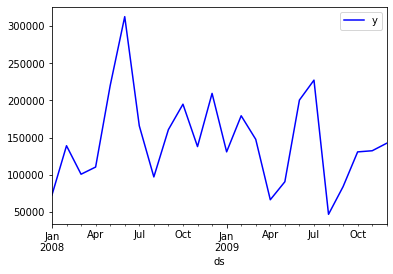

In [ ]:
#Plotagem simples Jan-2008 até Dez-2009
df_treino.plot(x="ds", y= "y",color="blue") # mostrando valores originais

Vamos repetir o processo de agrupar os totais dos lucros, mas dessa vez dividindo os lucros mensais por LOJA ID, dessa forma podemos comparar a evolução do lucro de cada loja nos anos de 2008 e 2009

In [ ]:
#Capturando o número de todas as lojas
df["ID Loja"].unique()

array([199, 306, 307])

Temos três filiais Loja ID 199, 306 e 307, comparando a parcela dos lucros correspondente a cada uma delas:

Em 2008 a Loja 199 teve a maior parcela dos lucros, as Lojas 307 e 306 tiveram um rendimento nos lucros aproximado

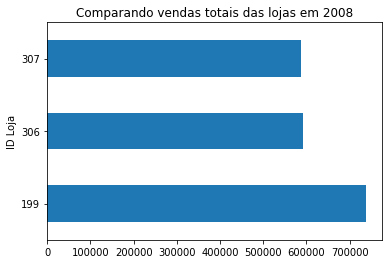

In [ ]:
prop_res_2008 = df.loc[(df["Data Venda"].dt.year == 2008)] #Filtrando os valores de 2008
prop_res_2008.groupby(prop_res_2008["ID Loja"])["Lucro"].sum().plot.barh(title='Comparando vendas totais das lojas em 2008')

Em 2009 a Loja 307 teve a maior parcela dos lucros no ano, em seguida vem as lojas 199 e 306 respectivamente. 

Comparando com 2008 a Loja 307 melhorou o desempenho nos lucros em 2009, as outras lojas tiveram redução nos lucros. 

O lucro total em 2009 foi menor do que o lucro total em 2008.

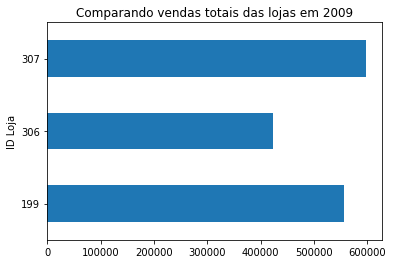

In [ ]:
prop_res_2009 = df.loc[(df["Data Venda"].dt.year == 2009)] #Filtrando os valores de 2009
prop_res_2009.groupby(prop_res_2009["ID Loja"])["Lucro"].sum().plot.barh(title='Comparando vendas totais das lojas em 2009')

**Preocupada com a redução dos lucros totais em 2009 a diretoria pede uma analise dos dias da semana que proporcionam maiores lucros**

Analisando apenas 2008, considerando apenas o fator lucro, notaremos que o dia de terça feira precisava de um reforço nas vendas para acompanhar a média dos demais dias.

([<matplotlib.axis.XTick at 0x7f916accb990>,
 [Text(0, 0, 'Seg'),
  Text(0, 0, 'Ter'),
  Text(0, 0, 'Qua'),
  Text(0, 0, 'Qui'),
  Text(0, 0, 'Sex'),
  Text(0, 0, 'Sab'),
  Text(0, 0, 'Dom')])

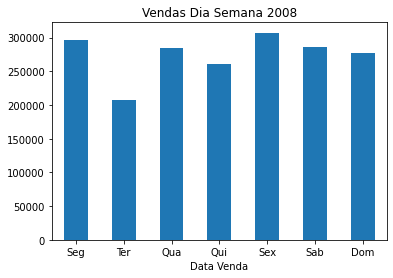

In [ ]:
import matplotlib.pyplot as plt
prop_dia_2008 = df.loc[(df["Data Venda"].dt.year == 2008)] 
prop_dia_2008.groupby(prop_dia_2008["Data Venda"].dt.dayofweek)["Lucro"].sum().plot.bar(title='Vendas Dia Semana 2008')
plt.xticks((0, 1, 2, 3, 4, 5, 6), ("Seg","Ter","Qua","Qui","Sex","Sab","Dom"), rotation='horizontal')

Em 2009 os lucros durante a semana(Segunda a Quinta) foram maiores do que os lucros no final de semana(Sexta a Dom). Os maiores lucros ocorreram na Terça e na Quinta.

([<matplotlib.axis.XTick at 0x7f916a703cd0>,
 [Text(0, 0, 'Seg'),
  Text(0, 0, 'Ter'),
  Text(0, 0, 'Qua'),
  Text(0, 0, 'Qui'),
  Text(0, 0, 'Sex'),
  Text(0, 0, 'Sab'),
  Text(0, 0, 'Dom')])

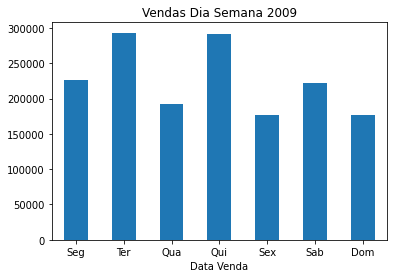

In [ ]:
prop_dia_2008 = df.loc[(df["Data Venda"].dt.year == 2009)] 
prop_dia_2008.groupby(prop_dia_2008["Data Venda"].dt.dayofweek)["Lucro"].sum().plot.bar(title='Vendas Dia Semana 2009')
plt.xticks((0, 1, 2, 3, 4, 5, 6), ("Seg","Ter","Qua","Qui","Sex","Sab","Dom"), rotation='horizontal')

**Além disso analise a evolução desses lucros ao longo do tempo.**

Vamos comparar a evolução do Lucro em cada Filial nos anos de 2008 e 2009

In [ ]:
#Filtrando os dados pelo ID da Loja no ano de 2008
#Loja 199
df1_2008 = df.loc[(df["Data Venda"].dt.year == 2008) & (df["ID Loja"] == 199)]
#Loja 306
df2_2008 = df.loc[(df["Data Venda"].dt.year == 2008) & (df["ID Loja"] == 306)]
#Loja 307
df3_2008 = df.loc[(df["Data Venda"].dt.year == 2008) & (df["ID Loja"] == 307)]

In [ ]:
#Totalizando os valores dos lucros por cada mês em 2008 
l199_calc_2008 = df1_2008.groupby(df1_2008["Data Venda"].dt.month)["Lucro"].sum().reset_index() 
l306_calc_2008 = df2_2008.groupby(df2_2008["Data Venda"].dt.month)["Lucro"].sum().reset_index()
l307_calc_2008 = df3_2008.groupby(df3_2008["Data Venda"].dt.month)["Lucro"].sum().reset_index()


In [ ]:
#Modificando para DataFrame
l199_calc_2008 = pd.DataFrame(l199_calc_2008)
l306_calc_2008 = pd.DataFrame(l306_calc_2008)
l307_calc_2008 = pd.DataFrame(l307_calc_2008)

In [ ]:
#Modificando o formato da data de inteiro para data em 2008
l199_calc_2008["Data Venda"] = pd.to_datetime({'year': [2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008], 
                                  'month': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
                                  'day': [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]})
l306_calc_2008["Data Venda"] = pd.to_datetime({'year': [2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008], 
                                  'month': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12], 
                                  'day': [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 31]})
l307_calc_2008["Data Venda"] = pd.to_datetime({'year': [2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008], 
                                  'month': [2, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
                                  'day': [28, 30, 31, 30, 31, 31, 30, 31, 30, 31]})

*No ano de 2008 a Loja 199 teve lucro em todos os meses*

In [ ]:
l199_calc_2008

,Data Venda,Lucro
0,2008-01-31,30178.020
1,2008-02-28,56238.700
2,2008-03-31,25280.860
3,2008-04-30,59491.200
4,2008-05-31,76988.100
5,2008-06-30,133622.460
6,2008-07-31,48208.080
7,2008-08-31,62143.654
8,2008-09-30,86552.882
9,2008-10-31,50529.820


*No ano de 2008 a Loja 306 não teve lucro no mês de Novembro*

In [ ]:
l306_calc_2008

,Data Venda,Lucro
0,2008-01-31,42455.420
1,2008-02-28,11360.180
2,2008-03-31,75365.460
3,2008-04-30,37134.880
4,2008-05-31,117596.880
5,2008-06-30,105063.720
6,2008-07-31,70799.580
7,2008-08-31,11815.735
8,2008-09-30,51578.746
9,2008-10-31,15979.612


*No ano de 2008 a Loja 307 não teve lucro nos meses de Janeiro e Março*

In [ ]:
l307_calc_2008

,Data Venda,Lucro
0,2008-02-28,71358.010
1,2008-04-30,13690.470
2,2008-05-31,25181.960
3,2008-06-30,73798.186
4,2008-07-31,46709.970
5,2008-08-31,23064.720
6,2008-09-30,22492.800
7,2008-10-31,128276.940
8,2008-11-30,87835.612
9,2008-12-31,96090.798


In [ ]:
#Filtrando os dados pelo ID da Loja no ano de 2009
#Loja 199
df1_2009 = df.loc[(df["Data Venda"].dt.year == 2009) & (df["ID Loja"] == 199)]
#Loja 306
df2_2009 = df.loc[(df["Data Venda"].dt.year == 2009) & (df["ID Loja"] == 306)]
#Loja 307
df3_2009 = df.loc[(df["Data Venda"].dt.year == 2009) & (df["ID Loja"] == 307)]

In [ ]:
#Totalizando os valores dos lucros por cada mês em 2009 
l199_calc_2009 = df1_2009.groupby(df1_2009["Data Venda"].dt.month)["Lucro"].sum().reset_index()
l306_calc_2009 = df2_2009.groupby(df2_2009["Data Venda"].dt.month)["Lucro"].sum().reset_index()
l307_calc_2009 = df3_2009.groupby(df3_2009["Data Venda"].dt.month)["Lucro"].sum().reset_index()

In [ ]:
#Modificando para DataFrame
l199_calc_2009 = pd.DataFrame(l199_calc_2009)
l306_calc_2009 = pd.DataFrame(l306_calc_2009)
l307_calc_2009 = pd.DataFrame(l307_calc_2009)

In [ ]:
#Modificando o formato da data de inteiro para data em 2009
l199_calc_2009['Data Venda'] = pd.to_datetime({'year': [2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009], 
                                  'month': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
                                  'day': [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]})
l306_calc_2009['Data Venda'] = pd.to_datetime({'year': [2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009], 
                                  'month': [1, 2, 3, 5, 6, 7, 10, 11, 12], 
                                  'day': [31, 28, 31, 31, 30, 31, 31, 30, 31]})
l307_calc_2009['Data Venda'] = pd.to_datetime({'year': [2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009], 
                                  'month': [1, 2, 3, 4, 6, 7, 9, 10, 11, 12], 
                                   'day': [31, 28, 31, 30, 30, 31, 30, 31, 30, 31]})

*No ano de 2009 a Loja 199 teve lucro em todos os meses*

In [ ]:
l199_calc_2009

,Data Venda,Lucro
0,2009-01-31,27541.128
1,2009-02-28,24940.670
2,2009-03-31,53569.374
3,2009-04-30,37760.460
4,2009-05-31,29302.080
5,2009-06-30,49809.720
6,2009-07-31,59771.200
7,2009-08-31,46756.420
8,2009-09-30,34341.744
9,2009-10-31,28225.100


*No ano de 2009 a Loja 306 não teve lucro no meses de Abril, Agosto e Setembro*

In [ ]:
l306_calc_2009

,Data Venda,Lucro
0,2009-01-31,40824.0100
1,2009-02-28,108810.1396
2,2009-03-31,15089.1200
3,2009-05-31,61237.9200
4,2009-06-30,39788.8200
5,2009-07-31,71496.1800
6,2009-10-31,36346.5120
7,2009-11-30,22328.0880
8,2009-12-31,27534.8960


*No ano de 2009 a Loja 307 não teve lucro no meses de Maio e Agosto*

In [ ]:
l307_calc_2009

,Data Venda,Lucro
0,2009-01-31,62353.904
1,2009-02-28,45478.114
2,2009-03-31,78879.760
3,2009-04-30,28593.926
4,2009-06-30,110711.870
5,2009-07-31,95867.130
6,2009-09-30,49610.880
7,2009-10-31,66106.440
8,2009-11-30,40711.552
9,2009-12-31,19798.414


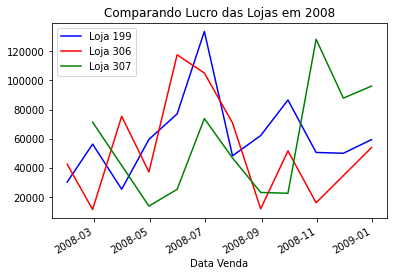

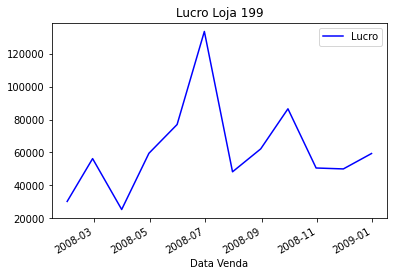

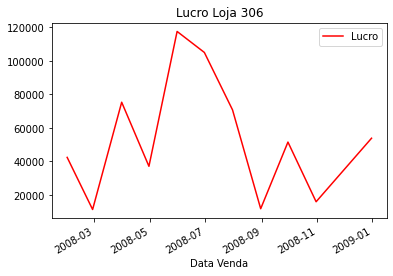

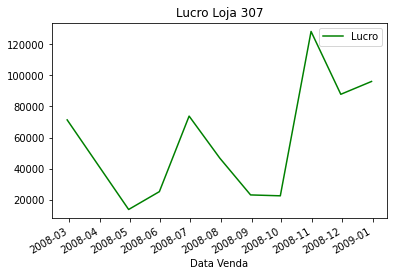

In [ ]:
#Comparando os lucros das três filiais no ano de 2008
ax = l199_calc_2008.plot(x="Data Venda", y= "Lucro",color="blue", title='Comparando Lucro das Lojas em 2008') # Vendas loja 199
l306_calc_2008.plot(x="Data Venda", y= "Lucro",color="red", ax=ax)  # Vendas loja 306
l307_calc_2008.plot(x="Data Venda", y= "Lucro",color="green", ax=ax)  # Vendas loja 307
ax.legend(["Loja 199", "Loja 306", "Loja 307"]); #legenda
l199_calc_2008.plot(x="Data Venda", y= "Lucro",color="blue", title='Lucro Loja 199') # Vendas loja 199
l306_calc_2008.plot(x="Data Venda", y= "Lucro",color="red", title='Lucro Loja 306') # Vendas loja 306
l307_calc_2008.plot(x="Data Venda", y= "Lucro",color="green", title='Lucro Loja 307') # Vendas loja 307

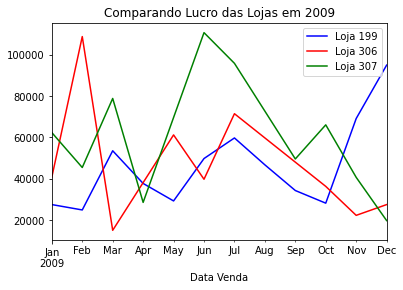

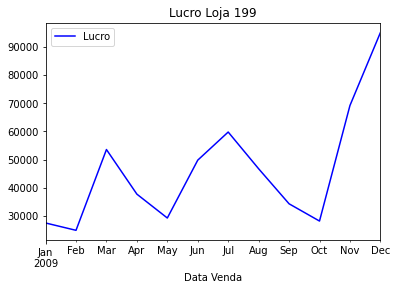

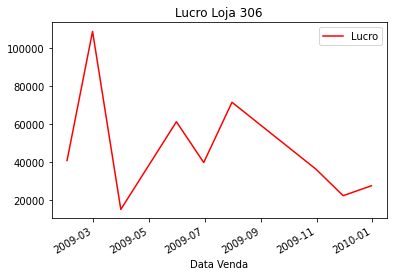

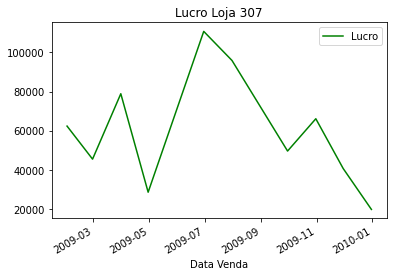

In [ ]:
#Comparando os lucros das três filiais no ano de 2009
ax = l199_calc_2009.plot(x="Data Venda", y= "Lucro",color="blue", title='Comparando Lucro das Lojas em 2009') # Vendas loja 199
l306_calc_2009.plot(x="Data Venda", y= "Lucro",color="red", ax=ax)  # Vendas loja 306
l307_calc_2009.plot(x="Data Venda", y= "Lucro",color="green", ax=ax)  # Vendas loja 307
ax.legend(["Loja 199", "Loja 306", "Loja 307"]); #legenda
l199_calc_2009.plot(x="Data Venda", y= "Lucro",color="blue", title='Lucro Loja 199') # Vendas loja 199
l306_calc_2009.plot(x="Data Venda", y= "Lucro",color="red", title='Lucro Loja 306') # Vendas loja 306
l307_calc_2009.plot(x="Data Venda", y= "Lucro",color="green", title='Lucro Loja 307') # Vendas loja 307

**Exercício final**

Vamos mudar a frequência dos dados de mensal para diário e interpolar os valores das novas datas inseridas. Criaremos novos dados no processo.

Faremos isso com as informações da Loja 199 em 2009

In [ ]:
#Dividindo os dados pelo ID da Loja 199 no ano de 2009
#Loja 199
dfp = df.loc[(df["Data Venda"].dt.year == 2009) & (df["ID Loja"] == 199)]

In [ ]:
dfp.shape

(146, 18)

In [ ]:
#Agrupando os lucros diários de cada Loja
dfp_calc = dfp.groupby(dfp["Data Venda"].dt.month)["Lucro"].sum()

In [ ]:
#Modificando para DataFrame
dfp_calc = pd.DataFrame(dfp_calc)
#renomeando as colunas para atender o padrão exigido pelo Prophet, o nome da coluna Data Venda precisa
#ser renomeado para ds e a coluna Lucro para y
df_valor = dfp_calc.reset_index().rename(columns = {"Data Venda": "ds", "Lucro": "y"})

In [ ]:
#Transformando a coluna mês no formato inteiro para o formato Ano-Mês-Dia para os anos de 2008 e 2009
#year = ano(formato xxxx)
#month = mês(faixa de valores de 1 até 12)
#day = dia do mês(faixa de valores de 1 até 31)
df_valor['ds'] = pd.to_datetime({'year': [2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009], 
                                  'month': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
                                  'day': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]})

In [ ]:
#Arrendondando o número de casas decimais de todos os valores na coluna y(Lucro) para 2 casas no campo dos valores
#para ficar mais adequado ao formato monetário
df_valor.round({'y': 2})

,ds,y
0,2009-01-01,27541.13
1,2009-02-01,24940.67
2,2009-03-01,53569.37
3,2009-04-01,37760.46
4,2009-05-01,29302.08
5,2009-06-01,49809.72
6,2009-07-01,59771.20
7,2009-08-01,46756.42
8,2009-09-01,34341.74
9,2009-10-01,28225.10


Modificação para dia com interpolação


In [ ]:
#Copiando dados filtrados
df_copia = df_valor.copy()
df_copia.index = df_copia['ds'] 
del df_copia['ds']

*Vamos preencher os valores diários com 'NaN'*

In [ ]:
#Fazendo um upsampling das datas ausentes no DataFrame com valores NaN
df_copiado = df_copia.resample('D').mean()

In [ ]:
df_copiado

,y
ds,
2009-01-01,27541.128
2009-01-02,NaN
2009-01-03,NaN
2009-01-04,NaN
2009-01-05,NaN
...,...
2009-11-27,NaN
2009-11-28,NaN
2009-11-29,NaN


*E nos valores 'NaN' inseridos fazemos uma interpolação*

In [ ]:
#Fazendo a interpolação dos valores
df_copiado['y'] = df_copiado['y'].interpolate()

*Dados Antes, verifique a coluna das datas*

In [ ]:
df_valor

,ds,y
0,2009-01-01,27541.128
1,2009-02-01,24940.670
2,2009-03-01,53569.374
3,2009-04-01,37760.460
4,2009-05-01,29302.080
5,2009-06-01,49809.720
6,2009-07-01,59771.200
7,2009-08-01,46756.420
8,2009-09-01,34341.744
9,2009-10-01,28225.100


*Dados depois, verifique a coluna das datas*

In [ ]:
df_copiado

,y
ds,
2009-01-01,27541.128000
2009-01-02,27457.242258
2009-01-03,27373.356516
2009-01-04,27289.470774
2009-01-05,27205.585032
...,...
2009-11-27,91552.605600
2009-11-28,92413.760200
2009-11-29,93274.914800


In [ ]:
#Removendo as datas do index
df_copiado = df_copiado.reset_index().round({'y': 2})

In [ ]:
#dimensão antes
df_valor.shape


(12, 2)

In [ ]:
#dimensão depois
df_copiado.shape

(335, 2)

*Comparação gráfica dos dados antes e depois, a variação continua a mesma apesar da mudança na dimensão dos dados.*

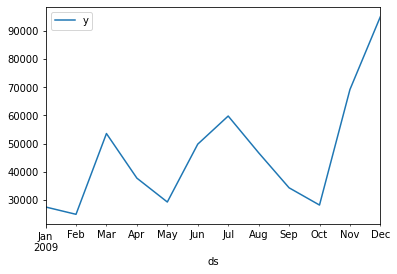

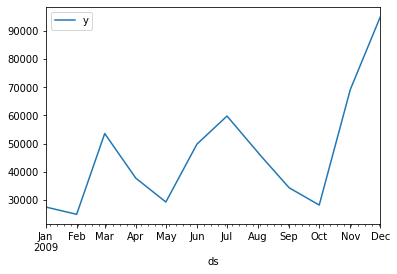

In [ ]:
#Comparando o antes e depois dos dados, sem datas ausentes e as datas com valores interpolados
df_valor.plot(x="ds", y= "y") #valores reais
df_copiado.plot(x="ds", y= "y") #valores interpolados

Agradeço a você por ter executado todo o código. Chegamos ao fim deste projeto, colocamos em prática várias formas de usar o Pandas e ainda existem muitas outras funções úteis, visite a documentação: https://pandas.pydata.org/docs/index.html

O projeto termina mas o aprendizado sempre deve continuar.

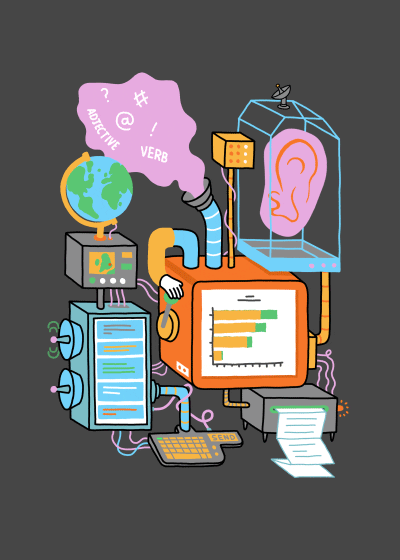